In [2]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib notebook

In [33]:
log_file = 'motor_test.log'
df = pd.read_csv(log_file,sep='\t',header=None, names=['timestamp','index','msg','value'])

     timestamp  index                                msg   value
0            0      1       M1:BATTERY_STATUS.voltages.0  3756.0
1            0      1  M1:BATTERY_STATUS.current_battery     0.0
2         1839      1       M1:BATTERY_STATUS.voltages.0  3756.0
3         1839      1  M1:BATTERY_STATUS.current_battery     0.0
4         3683      1       M1:BATTERY_STATUS.voltages.0  3699.0
5         3683      1  M1:BATTERY_STATUS.current_battery  2989.0
6         5523      1       M1:BATTERY_STATUS.voltages.0  3721.0
7         5523      1  M1:BATTERY_STATUS.current_battery   456.0
8         7360      1       M1:BATTERY_STATUS.voltages.0  3712.0
9         7360      1  M1:BATTERY_STATUS.current_battery   341.0
10        9203      1       M1:BATTERY_STATUS.voltages.0  3707.0
11        9203      1  M1:BATTERY_STATUS.current_battery   327.0
12       11041      1       M1:BATTERY_STATUS.voltages.0  3716.0
13       11041      1  M1:BATTERY_STATUS.current_battery   328.0
14       12882      1    

In [163]:
grouped = df.groupby('msg')
for msg,group in grouped:
    if msg == 'M1:BATTERY_STATUS.current_battery':
        time = group['timestamp']/1e3
        time.name = 'time'
        time.index=range(len(time))
        current = group['value']/1e2
        current.name = 'current'
        current.index=range(len(current))
    elif msg == 'M1:BATTERY_STATUS.voltages.0':
        voltage = group['value']/1e3
        voltage.name = 'voltage'
        voltage.index=range(len(voltage))

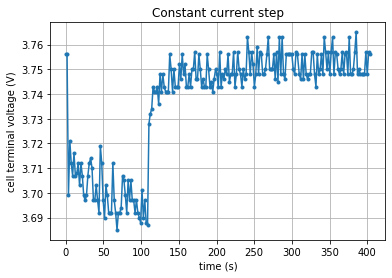

In [166]:
plt.figure()
plt.plot(time,voltage,'.-')
plt.xlabel('time (s)')
plt.ylabel('cell terminal voltage (V)')
plt.title('Constant current step')
plt.grid()
plt.show()

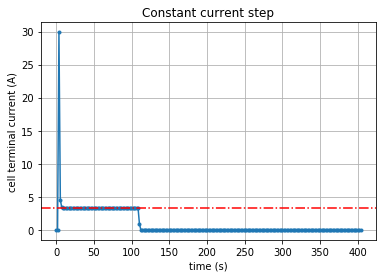

In [267]:
plt.figure()
plt.plot(time,current,'.-')
plt.axhline(3.3,color='r',linestyle='-.')
plt.xlabel('time (s)')
plt.ylabel('cell terminal current (A)')
plt.title('Constant current step')
plt.grid()
plt.show()

In [181]:
current[59:63]

59    3.34
60    0.93
61    0.04
62    0.00
Name: current, dtype: float64

In [196]:
voltage[57:64]

57    3.697
58    3.688
59    3.687
60    3.728
61    3.732
62    3.734
63    3.743
Name: voltage, dtype: float64

In [248]:
dv0 = voltage[60]-voltage[59]
di = current[59]-current[62]
print(di)

3.34


In [268]:
R0 = dv0/di
print(f'R0 = {R0} Ohm')

R0 = 0.012275449101796518 Ohm


In [269]:
vss = np.mean(voltage[time>300])
dvss = vss - voltage[59]
R1 = (dvss - dv0)/di
print(f'R1 = {R1} Ohm')

R1 = 0.007255132591958727 Ohm


In [253]:
time.index[time>250]

Int64Index([136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
            149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
            162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
            175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
            188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
            201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
            214, 215, 216, 217, 218, 219],
           dtype='int64')

In [256]:
dtime = time[136]-time[59]

In [272]:
C1 = dtime/(5*R1)
print(f'C1 = {C1/1e3} kF')

C1 = 3.9050147796611308 kF


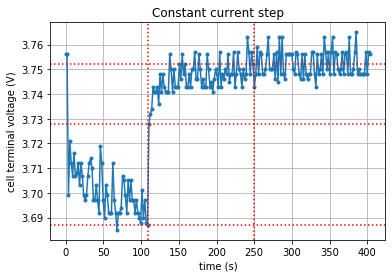

In [258]:
plt.figure()
plt.plot(time,voltage,'.-')
plt.axhline(voltage[59],color='r',linestyle=':')
plt.axhline(voltage[60],color='r',linestyle=':')
plt.axhline(vss,color='r',linestyle=':')
plt.axvline(time[59],color='r',linestyle=':')
plt.axvline(time[136],color='r',linestyle=':')
plt.xlabel('time (s)')
plt.ylabel('cell terminal voltage (V)')
plt.title('Constant current step')
plt.grid()
plt.show()

In [263]:
dt = np.mean(np.diff(time))
Q = 7000 # mAh
z0 = 0.39

In [264]:
z = []
z.append(z0)
i1 = [] 
i1.append(0)

i = current

for k in range(len(time)-1):
    z.append(z[k] - dt/Q * i[k])
    i1.append(np.exp(-dt/(R1*C1)) * i1[k] + (1 - np.exp(-dt/(R1*C1)))*i[k])
    v[k] = OCV[z[k]] - R1*i1[k] - R0*i[k]

NameError: name 'OCV' is not defined